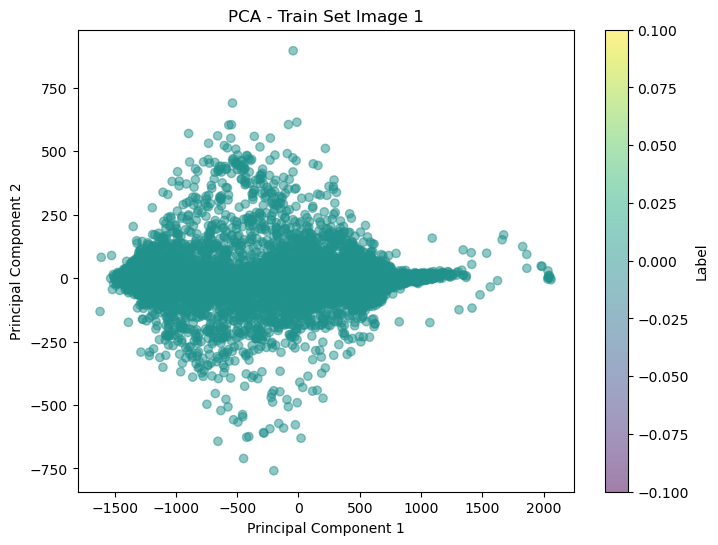

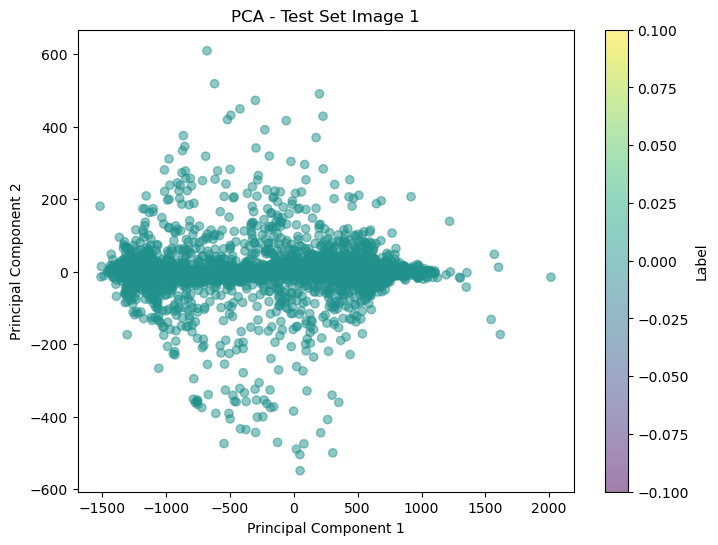

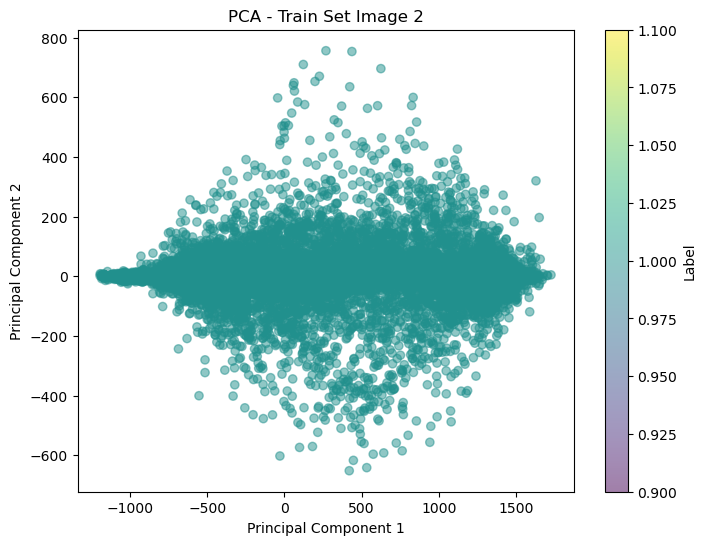

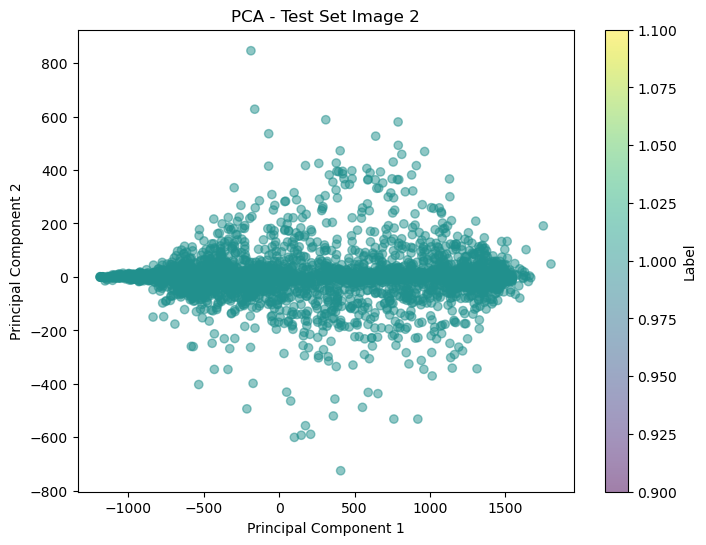

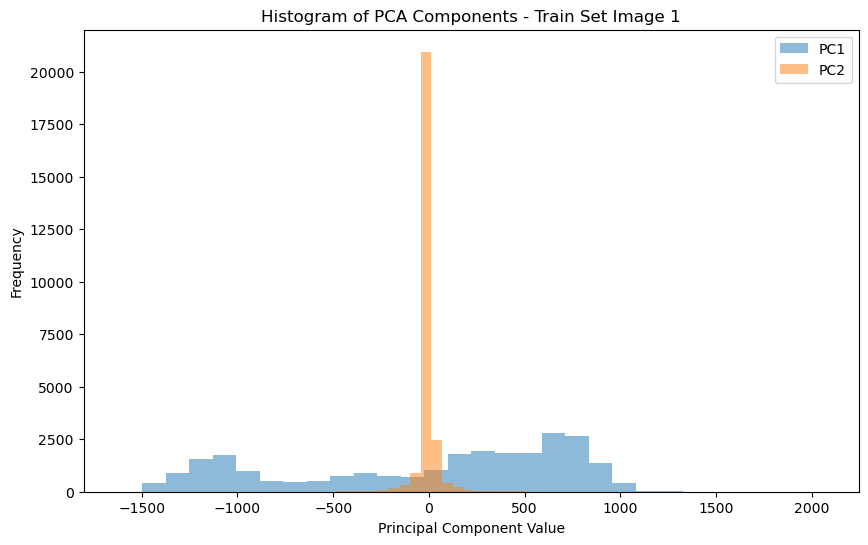

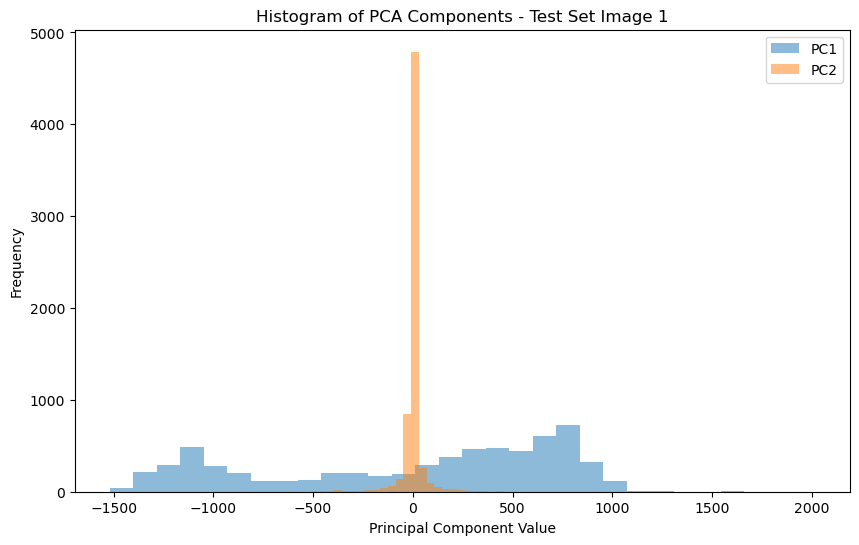

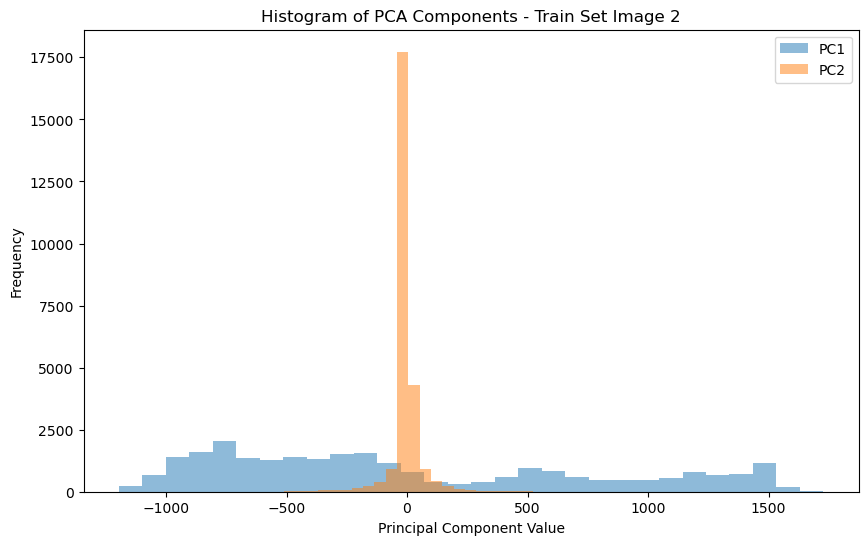

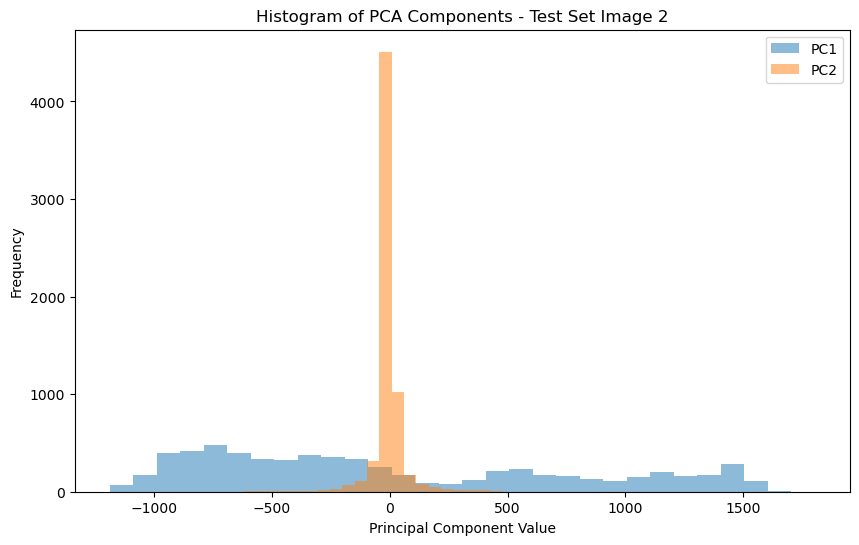

Mean of PC1: 6.203891480128621e-14, Variance of PC1: 540448.1203740968
Mean of PC2: 2.4387469336478457e-14, Variance of PC2: 3299.272769724138
Mean of PC1: -2.863665984900098e-14, Variance of PC1: 543667.5474770565
Mean of PC2: 1.6845094028824108e-14, Variance of PC2: 3161.9750523431026
Mean of PC1: -4.547648958284328e-14, Variance of PC1: 612191.3317509539
Mean of PC2: -2.3317227876388395e-14, Variance of PC2: 4497.543001306483
Mean of PC1: -2.695215044611857e-14, Variance of PC1: 615606.8801627186
Mean of PC2: -3.425169119194235e-14, Variance of PC2: 4705.940595885574


In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load datasets as DataFrames
train_image1 = pd.read_csv('train_image1.csv')
test_image1 = pd.read_csv('test_image1.csv')
train_image2 = pd.read_csv('train_image2.csv')
test_image2 = pd.read_csv('test_image2.csv')
# Convert DataFrames to numpy arrays
train_vectors1 = train_image1.to_numpy()
test_vectors1 = test_image1.to_numpy()
train_vectors2 = train_image2.to_numpy()
test_vectors2 = test_image2.to_numpy()
# Function to apply PCA
def apply_pca(vectors, n_components=2):
    # Separate features and labels
    data = np.array(vectors)
    features = data[:, :-1]  # All columns except the last (label)
    labels = data[:, -1]    # Last column is the label
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(features)
    # Combine reduced features with labels
    reduced_vectors = np.hstack((pca_features, labels.reshape(-1, 1)))
    return reduced_vectors, pca
# Apply PCA to train and test sets
reduced_train_image1, pca1 = apply_pca(train_vectors1, n_components=2)
reduced_test_image1, _ = apply_pca(test_vectors1, n_components=2)
reduced_train_image2, pca2 = apply_pca(train_vectors2, n_components=2)
reduced_test_image2, _ = apply_pca(test_vectors2, n_components=2)
# Convert reduced data to DataFrames
df_reduced_train_image1 = pd.DataFrame(reduced_train_image1, columns=["PC1", "PC2", "Label"])
df_reduced_test_image1 = pd.DataFrame(reduced_test_image1, columns=["PC1", "PC2", "Label"])
df_reduced_train_image2 = pd.DataFrame(reduced_train_image2, columns=["PC1", "PC2", "Label"])
df_reduced_test_image2 = pd.DataFrame(reduced_test_image2, columns=["PC1", "PC2", "Label"])
# Save the reduced datasets to CSV
df_reduced_train_image1.to_csv("reduced_train_image1.csv", index=False)
df_reduced_train_image2.to_csv("reduced_train_image2.csv", index=False)
df_reduced_test_image1.to_csv("reduced_test_image1.csv", index=False)
df_reduced_test_image2.to_csv("reduced_test_image2.csv", index=False)
# Plot PCA-reduced scatter plots
def plot_pca_scatter(df, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(df["PC1"], df["PC2"], c=df["Label"], cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Label")
    plt.show()
# Function to plot histograms of PCA components
def plot_pca_histograms(df, title):
    plt.figure(figsize=(10, 6))
    plt.hist(df["PC1"], bins=30, alpha=0.5, label='PC1')
    plt.hist(df["PC2"], bins=30, alpha=0.5, label='PC2')
    plt.title(title)
    plt.xlabel("Principal Component Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
# Function to calculate mean and variance for PCA components
def plot_pca_statistics(df):
    mean_pc1 = np.mean(df["PC1"])
    mean_pc2 = np.mean(df["PC2"])
    var_pc1 = np.var(df["PC1"])
    var_pc2 = np.var(df["PC2"])
    print(f"Mean of PC1: {mean_pc1}, Variance of PC1: {var_pc1}")
    print(f"Mean of PC2: {mean_pc2}, Variance of PC2: {var_pc2}")
# Visualize PCA results
plot_pca_scatter(df_reduced_train_image1, "PCA - Train Set Image 1")
plot_pca_scatter(df_reduced_test_image1, "PCA - Test Set Image 1")
plot_pca_scatter(df_reduced_train_image2, "PCA - Train Set Image 2")
plot_pca_scatter(df_reduced_test_image2, "PCA - Test Set Image 2")
# Plot histograms for the selected features (PC1 and PC2)
plot_pca_histograms(df_reduced_train_image1, "Histogram of PCA Components - Train Set Image 1")
plot_pca_histograms(df_reduced_test_image1, "Histogram of PCA Components - Test Set Image 1")
plot_pca_histograms(df_reduced_train_image2, "Histogram of PCA Components - Train Set Image 2")
plot_pca_histograms(df_reduced_test_image2, "Histogram of PCA Components - Test Set Image 2")
# Calculate and print mean and variance for each dataset
plot_pca_statistics(df_reduced_train_image1)
plot_pca_statistics(df_reduced_test_image1)
plot_pca_statistics(df_reduced_train_image2)
plot_pca_statistics(df_reduced_test_image2)

In [15]:
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Function to apply PCA
def apply_pca(X_train, n_components=50):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)  # Reduce dimensionality
    return X_train_pca, pca
# Load training data
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
X_train = df_train.iloc[:, :-1].values  # Features
y_train = df_train.iloc[:, -1].values   # Target labels
# Apply PCA to training data
X_train_pca, pca = apply_pca(X_train, n_components=50)
# Function to transform test data using PCA
def transform_with_pca(X_test, pca):
    return pca.transform(X_test)  # Apply the same PCA transformation
# Load test data
df_test1 = pd.read_csv('test_image1.csv', header=None)
df_test2 = pd.read_csv('test_image2.csv', header=None)
X_test1 = df_test1.iloc[:, :-1].values
X_test2 = df_test2.iloc[:, :-1].values
# Apply PCA transformation on test data
X_test1_pca = transform_with_pca(X_test1, pca)
X_test2_pca = transform_with_pca(X_test2, pca)
# Train ElasticNet model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_pca, y_train)
# Function to evaluate and save predictions for test sets
def add_predictions_to_test_set_pca(test_file, model, pca, threshold=0.5):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Apply PCA to test data
    X_test_pca = transform_with_pca(X_test, pca)
    # Make predictions
    y_pred = model.predict(X_test_pca)
    y_pred_binary = (y_pred > threshold).astype(int)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Accuracy on {test_file}: {accuracy * 100:.2f}%")
    # Calculate precision and recall
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    print(f"Precision on {test_file}: {precision * 100:.2f}%")
    print(f"Recall on {test_file}: {recall * 100:.2f}%")
    # Add actual and predicted labels to the DataFrame
    df_test['Actual Label'] = y_test
    df_test['Predicted Label'] = y_pred_binary
    # Dynamic headers based on number of PCA components
    num_features = df_test.shape[1] - 2  # Exclude actual and predicted labels
    feature_headers = [f'Feature{i+1}' for i in range(num_features)]
    headers = feature_headers + ['Actual Label', 'Predicted Label']
    # Check header alignment
    assert len(headers) == df_test.shape[1], f"Header count does not match data columns"
    # Save results
    output_file = test_file.replace('.csv', '_with_predictions_task2_pca.csv')
    df_test.to_csv(output_file, index=False, header=headers)
    print(f"Full output saved as '{output_file}'")
    # Save confusion matrix
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task2_pca.csv')
    conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
# Apply PCA and evaluate on test data
add_predictions_to_test_set_pca('test_image1.csv', model, pca)
add_predictions_to_test_set_pca('test_image2.csv', model, pca)
add_predictions_to_test_set_pca('train_image1.csv', model, pca)
add_predictions_to_test_set_pca('train_image2.csv', model, pca)

Accuracy on test_image1.csv: 42.84%
Precision on test_image1.csv: 0.00%
Recall on test_image1.csv: 0.00%
Full output saved as 'test_image1_with_predictions_task2_pca.csv'
Confusion matrix saved as 'test_image1_confusion_matrix_task2_pca.csv'
Accuracy on test_image2.csv: 62.42%
Precision on test_image2.csv: 100.00%
Recall on test_image2.csv: 62.42%
Full output saved as 'test_image2_with_predictions_task2_pca.csv'
Confusion matrix saved as 'test_image2_confusion_matrix_task2_pca.csv'
Accuracy on train_image1.csv: 42.20%
Precision on train_image1.csv: 0.00%
Recall on train_image1.csv: 0.00%
Full output saved as 'train_image1_with_predictions_task2_pca.csv'
Confusion matrix saved as 'train_image1_confusion_matrix_task2_pca.csv'
Accuracy on train_image2.csv: 63.03%
Precision on train_image2.csv: 100.00%
Recall on train_image2.csv: 63.03%
Full output saved as 'train_image2_with_predictions_task2_pca.csv'
Confusion matrix saved as 'train_image2_confusion_matrix_task2_pca.csv'


In [16]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.decomposition import PCA
import numpy as np

# Load and combine training data from both CSV files
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
# Separate features and target
X_train = df_train.iloc[:, :-1].values  # All columns except the last for features
y_train = df_train.iloc[:, -1].values   # The last column as target (binary or multiclass)
# Apply PCA to the training feature space
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
# Check if it’s binary or multi-class
num_classes = len(pd.Series(y_train).unique())
if num_classes == 2:
    # Binary classification setup
    y_train = (y_train == 1).astype(int)  # Ensure binary target as 0 and 1
    output_units = 1
    loss_function = 'binary_crossentropy'
    final_activation = 'sigmoid'
else:
    # Multi-class setup
    y_train = to_categorical(y_train, num_classes=num_classes)
    output_units = num_classes
    loss_function = 'categorical_crossentropy'
    final_activation = 'softmax'
# Initialize the Sequential model
model = Sequential()
model.add(Input(shape=(X_train_pca.shape[1],)))  # Use PCA-transformed features
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(output_units, activation=final_activation))
# Compile the model
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
# Train the model on PCA-transformed features
model.fit(X_train_pca, y_train, epochs=50, batch_size=32, verbose=1)
# Function to evaluate the model on a test set
def evaluate_model(test_file, model, num_classes, pca, threshold=0.5):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    # Separate features and actual labels
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Apply PCA to the test feature space
    X_test_pca = pca.transform(X_test)
    # Predict and convert to binary/multi-class predictions
    y_pred_probs = model.predict(X_test_pca)
    if num_classes == 2:
        # Binary classification thresholding
        y_pred = (y_pred_probs > threshold).astype(int).flatten()
    else:
        # Multi-class predictions
        y_pred = y_pred_probs.argmax(axis=1)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    # Print metrics
    print(f"Accuracy on {test_file}: {accuracy * 100:.2f}%")
    print(f"Precision on {test_file}: {precision:.2f}")
    print(f"Recall on {test_file}: {recall:.2f}")
    # Add columns for actual and predicted labels
    df_test['Actual Label'] = y_test
    df_test['Predicted Label'] = y_pred
    # Generate dynamic headers
    num_features = df_test.shape[1] - 2  # Exclude 'Actual Label' and 'Predicted Label'
    feature_headers = [f'Feature{i+1}' for i in range(num_features)]
    headers = feature_headers + ['Actual Label', 'Predicted Label']
    # Check header alignment
    assert len(headers) == df_test.shape[1], f"Header count {len(headers)} does not match data columns {df_test.shape[1]}"
    # Save the full output with predictions
    output_file = test_file.replace('.csv', '_with_predictions_task3_pca.csv')
    df_test.to_csv(output_file, index=False, header=headers)
    print(f"Full output saved as '{output_file}'")
    # Construct and save confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=range(num_classes))
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task3_pca.csv')
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=[f"Actual {i}" for i in range(conf_matrix.shape[0])], 
                                  columns=[f"Predicted {i}" for i in range(conf_matrix.shape[1])])
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
# Apply PCA to both test sets and evaluate the model
evaluate_model('test_image1.csv', model, num_classes=num_classes, pca=pca)
evaluate_model('test_image2.csv', model, num_classes=num_classes, pca=pca)
# Apply PCA to both training sets and evaluate the model
evaluate_model('train_image1.csv', model, num_classes=num_classes, pca=pca)
evaluate_model('train_image2.csv', model, num_classes=num_classes, pca=pca)

Epoch 1/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 666us/step - accuracy: 0.5186 - loss: 2.0072
Epoch 2/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.5231 - loss: 1.1428
Epoch 3/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.5265 - loss: 0.9267
Epoch 4/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.5259 - loss: 0.8871
Epoch 5/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.5313 - loss: 0.7884
Epoch 6/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.5329 - loss: 0.7658
Epoch 7/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.5295 - loss: 0.7383
Epoch 8/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.5331 - loss: 0.7209
Epoch 9/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.5370 - loss: 0.7028
Epoch 10/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.5424 - loss: 0.6889
Epoch 11/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.5517 - loss: 0.6813
Epoch 12

In [17]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to evaluate the model
def evaluate_model(test_file, model, is_rf=False, scaler=None, pca=None):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    # Separate features and actual labels
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Standardize the features and apply PCA if provided
    if scaler and pca:
        X_test_scaled = scaler.transform(X_test)  # Apply scaling to test data
        X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to test data
    else:
        X_test_pca = X_test  # If no scaling/PCA, use raw features
    # Predict probabilities and convert to binary predictions for Keras model
    if not is_rf:
        y_pred_probs = model.predict(X_test_pca)
        y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold for binary classification
    else:
        # Direct predictions for Random Forest
        y_pred = model.predict(X_test_pca)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    # Print metrics
    print(f"Metrics for {test_file}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # Save confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Creating confusion matrix DataFrame
    if conf_matrix.shape[0] == 2 and conf_matrix.shape[1] == 2:  # Binary classification
        conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"], 
                                       columns=["Predicted Negative", "Predicted Positive"])
    else:  # For cases where not all classes are present
        unique_classes = sorted(set(y_test) | set(y_pred))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'Actual {cls}' for cls in unique_classes], 
                                       columns=[f'Predicted {cls}' for cls in unique_classes])
    print("Confusion Matrix:")
    print(conf_matrix_df)
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task4.csv')
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
# Load and combine training data from both CSV files
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
# Separate features and target
X_train = df_train.iloc[:, :-1].values  # All columns except the last for features
y_train = df_train.iloc[:, -1].values   # The last column as target (binary or multiclass)
# Standardize the features (PCA works better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
# Initialize the Sequential model for Keras
model = Sequential()
model.add(Input(shape=(X_train_pca.shape[1],)))  # Use PCA-transformed input
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_pca, y_train, epochs=50, batch_size=32, verbose=1)
# Train Random Forest model on PCA-transformed features
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train)
# Evaluate both models on the test data
print("\nEvaluating Keras Model on test_image1.csv (PCA-based):")
evaluate_model('test_image1.csv', model, scaler=scaler, pca=pca)
print("\nEvaluating Random Forest Model on test_image1.csv (PCA-based):")
evaluate_model('test_image1.csv', rf_model, is_rf=True, scaler=scaler, pca=pca)
print("\nEvaluating Keras Model on test_image2.csv (PCA-based):")
evaluate_model('test_image2.csv', model, scaler=scaler, pca=pca)
print("\nEvaluating Random Forest Model on test_image2.csv (PCA-based):")
evaluate_model('test_image2.csv', rf_model, is_rf=True, scaler=scaler, pca=pca)
print("\nEvaluating Keras Model on train_image1.csv (PCA-based):")
evaluate_model('train_image1.csv', model, scaler=scaler, pca=pca)
print("\nEvaluating Random Forest Model on train_image1.csv (PCA-based):")
evaluate_model('train_image1.csv', rf_model, is_rf=True, scaler=scaler, pca=pca)
print("\nEvaluating Keras Model on train_image2.csv (PCA-based):")
evaluate_model('train_image2.csv', model, scaler=scaler, pca=pca)
print("\nEvaluating Random Forest Model on train_image2.csv (PCA-based):")
evaluate_model('train_image2.csv', rf_model, is_rf=True, scaler=scaler, pca=pca)

Epoch 1/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.5363 - loss: 0.6988
Epoch 2/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.5526 - loss: 0.6751
Epoch 3/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.5786 - loss: 0.6598
Epoch 4/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.5886 - loss: 0.6557
Epoch 5/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.5930 - loss: 0.6531
Epoch 6/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.5942 - loss: 0.6511
Epoch 7/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.5933 - loss: 0.6506
Epoch 8/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.5968 - loss: 0.6493
Epoch 9/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.5974 - loss: 0.6507
Epoch 10/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.5971 - loss: 0.6512
Epoch 11/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.6000 - loss: 0.6496
Epoch 12